**Problem Definition:**

Customer Churn Prediction is a machine learning problem that aims to identify customers who are likely to stop using a product or service. The goal is to analyze historical customer data and predict churn risk, enabling businesses to take proactive retention measures.

**Importing the Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**Collecting the Data**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/4-2 PROJECTS/MACHINE LEARNING/Customer_churn_data.csv")

**Exploring the Dataset**

Check the few rows of the Datset

In [ ]:
dataset.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0


Get the Basic Information of the Dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3138 non-null   object 
 1   Complains                3137 non-null   object 
 2   Subscription  Length     3145 non-null   float64
 3   Charge  Amount           3148 non-null   object 
 4   Seconds of Use           3111 non-null   object 
 5   Frequency of use         3131 non-null   float64
 6   Frequency of SMS         3146 non-null   float64
 7   Distinct Called Numbers  3148 non-null   float64
 8   Tariff Plan              3150 non-null   int64  
 9   Status                   3150 non-null   int64  
 10  Age                      3150 non-null   int64  
 11  Customer Value           3058 non-null   float64
 12  FN                       3150 non-null   float64
 13  FP                       3150 non-null   float64
 14  Churn                   

Check the Column names of the Dataset

In [ ]:
dataset.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')

Summary Statistics

In [ ]:
dataset.describe()

,Subscription Length,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3145.000000,3131.000000,3146.000000,3148.000000,3150.000000,3150.000000,3150.000000,3058.000000,3150.000000,3150.000000,3150.000000
mean,32.333229,69.495688,73.262238,23.502541,1.077778,1.248254,34.820000,485.142147,423.875624,98.304688,0.157143
std,9.346742,57.798799,112.282285,17.227602,0.267864,0.432069,14.620541,518.143922,465.313890,50.724492,0.363993
min,-40.000000,-176.000000,-9.000000,0.000000,1.000000,1.000000,-13.000000,0.000000,0.000000,60.000000,0.000000
25%,29.000000,28.000000,6.000000,10.000000,1.000000,1.000000,25.000000,122.107500,102.421125,61.380125,0.000000
50%,35.000000,54.000000,21.000000,21.000000,1.000000,1.000000,34.000000,237.757500,205.632000,72.848000,0.000000
75%,38.000000,95.000000,87.750000,34.000000,1.000000,1.000000,42.000000,803.745000,709.549875,128.838875,0.000000
max,47.000000,255.000000,522.000000,97.000000,2.000000,2.000000,233.000000,2165.280000,1948.752000,266.528000,1.000000


Check for Missing Values

In [ ]:
dataset.isnull().sum()

,0
Call Failure,12
Complains,13
Subscription Length,5
Charge Amount,2
Seconds of Use,39
Frequency of use,19
Frequency of SMS,4
Distinct Called Numbers,2
Tariff Plan,0
Status,0


Check for Duplicates

In [ ]:
dataset.duplicated().sum()

18

Understanding the Data Distributions

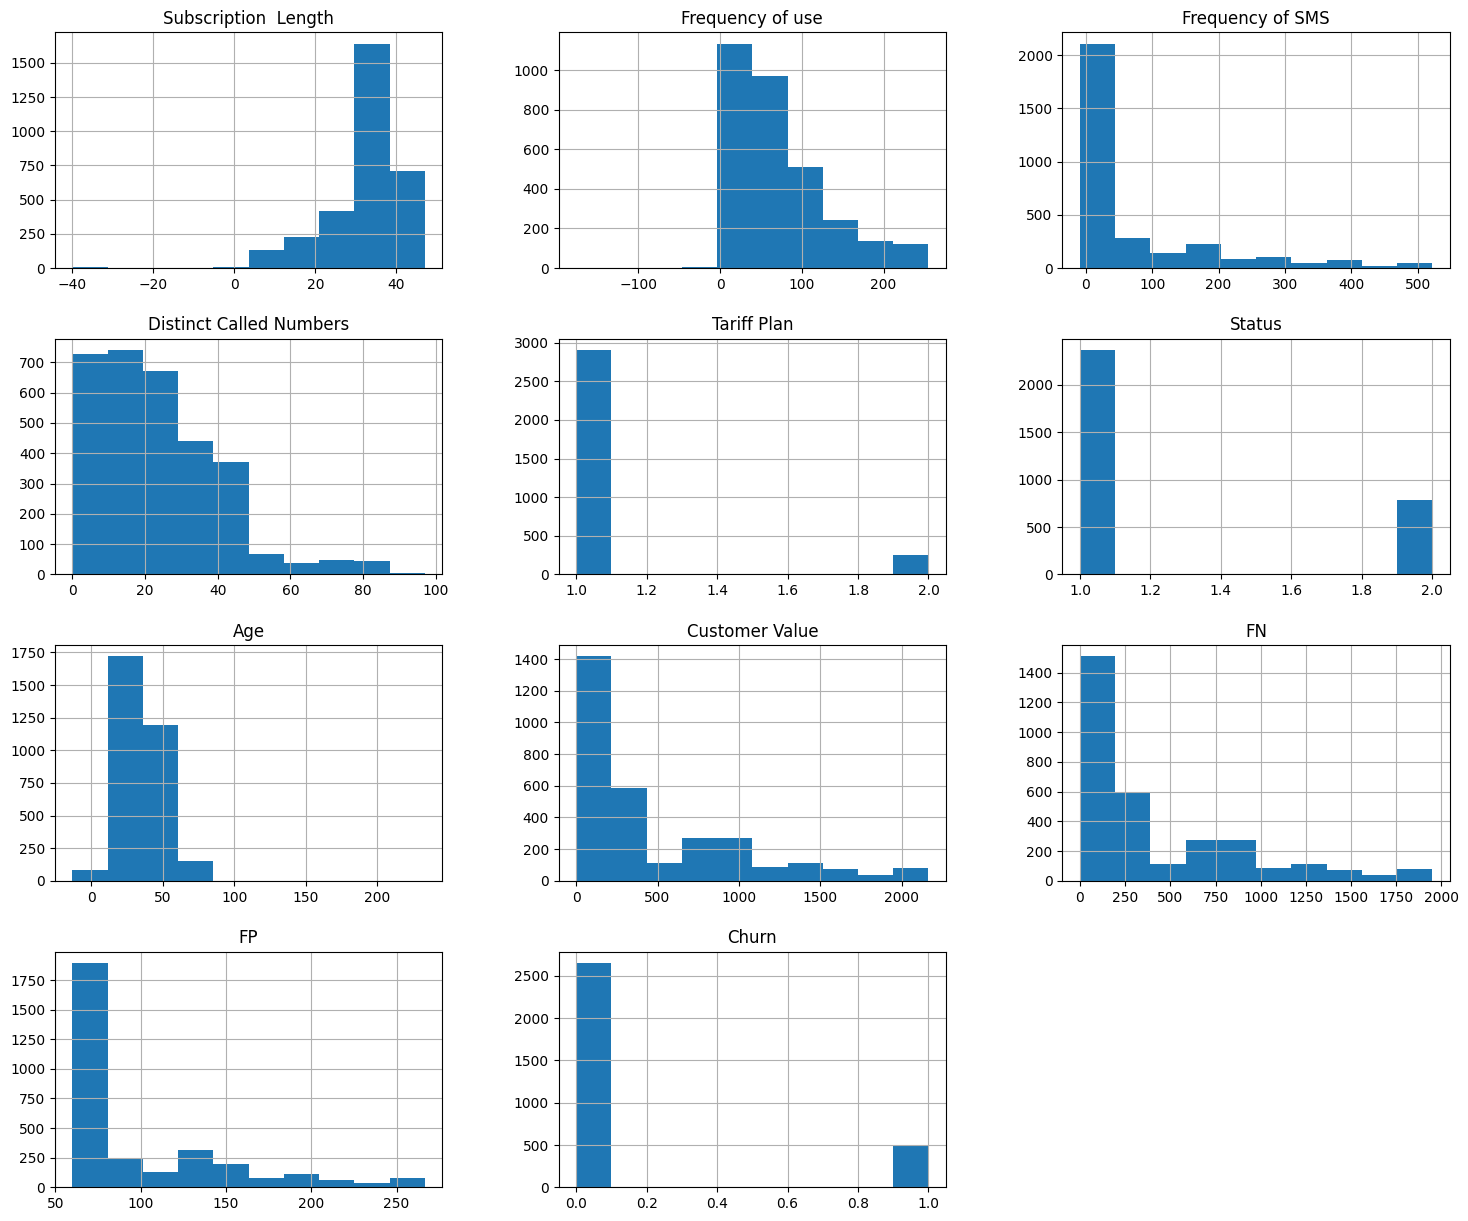

In [ ]:
dataset.hist(figsize=(18, 15))
plt.show()

**Data-Preprocessing**

Handle Missing Values

In [ ]:
dataset.columns = dataset.columns.str.replace(r'\s+', '_', regex=True)

In [ ]:
dataset = dataset.fillna(method= 'ffill')

<ipython-input-11-79977565e917>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset = dataset.fillna(method= 'ffill')


In [ ]:
# Convert numeric columns stored as objects
numeric_cols = ["Call_Failure", "Charge_Amount", "Seconds_of_Use"]
for col in numeric_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Convert categorical columns using Label Encoding
categorical_cols = ["Complains"]  # Add other categorical columns if needed
le = LabelEncoder()
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

# Fill missing values with median (for numerical stability)
dataset.fillna(dataset.median(), inplace=True)

**Model Training**

**Logistic Regression**

Splitting Data into Training and Testing

In [ ]:
X = dataset.drop(columns=["Churn"])
y = dataset["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Logistic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Make Predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluate Model Performance

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       531
           1       0.55      0.29      0.38        99

    accuracy                           0.85       630
   macro avg       0.71      0.62      0.65       630
weighted avg       0.83      0.85      0.83       630


Confusion Matrix:
 [[507  24]
 [ 70  29]]


Decision Tree Learning

In [ ]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.69      0.62      0.65        99

    accuracy                           0.90       630
   macro avg       0.81      0.78      0.80       630
weighted avg       0.89      0.90      0.89       630


Confusion Matrix:
 [[504  27]
 [ 38  61]]


**Naive Bayes Classifier**

In [ ]:
# Initialize and train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print(f"Naïve Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.60      0.74       531
           1       0.28      0.86      0.43        99

    accuracy                           0.64       630
   macro avg       0.62      0.73      0.58       630
weighted avg       0.85      0.64      0.69       630


Confusion Matrix:
 [[317 214]
 [ 14  85]]


**Random Forest Model**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 0.94


**K-Nearest Neighbours**

In [ ]:
# Initialize KNN with k=5 (you can tune this value)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.76      0.57      0.65        99

    accuracy                           0.90       630
   macro avg       0.84      0.77      0.80       630
weighted avg       0.90      0.90      0.90       630


Confusion Matrix:
 [[513  18]
 [ 43  56]]


**Support Vector Machine**

In [ ]:
# Initialize SVM with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       531
           1       0.97      0.36      0.53        99

    accuracy                           0.90       630
   macro avg       0.93      0.68      0.74       630
weighted avg       0.91      0.90      0.88       630


Confusion Matrix:
 [[530   1]
 [ 63  36]]


**Data Visualizations**

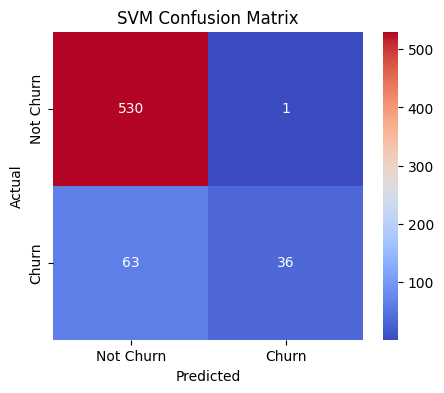

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

**Correlation Heat Map**

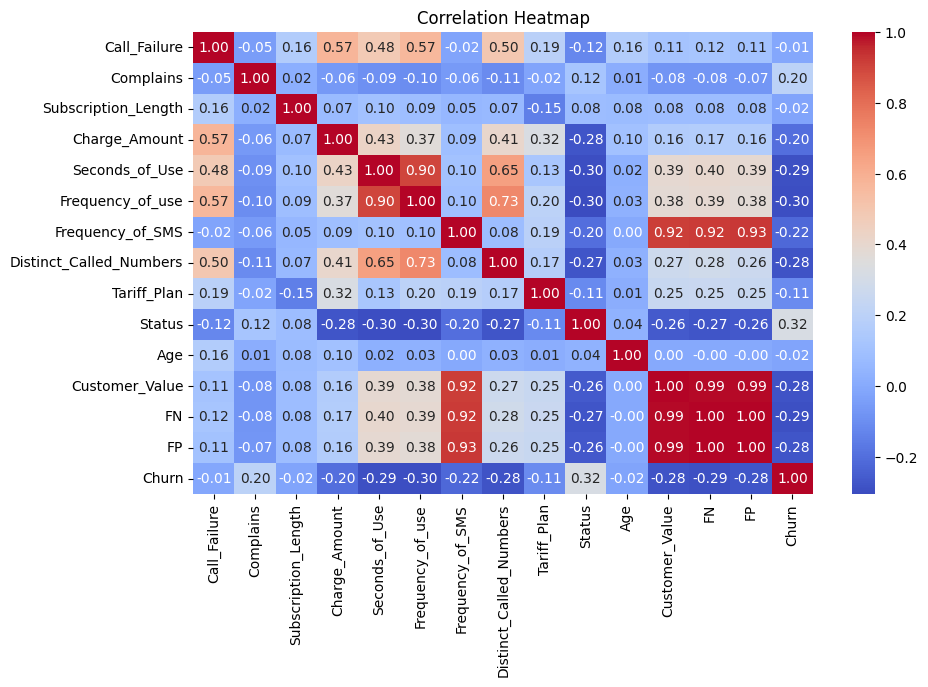

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()